In [16]:
import numpy as np
from astropy.io import fits
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
from astropy import units as u
%matplotlib inline

#input the lower and upper velocity ranges we're interested in here. The native velocity goes from -5 to +100 km/s
#so we don't need all that!! Note that these values should be inputted in km/s.
lower_vel=40
upper_vel=55

#read in your filament mask and GRS data here 
mask,hdr=fits.getdata("Fil5_Mask_Final.fits",header=True)
cube=SpectralCube.read("Fil5_GRS_Cube.fits")
cube=cube.with_spectral_unit(u.km/u.s)
slab=cube.spectral_slab(lower_vel*u.km/u.s, upper_vel*u.km/u.s)

#figure out the velocity, latitude, and longitude range of your new spectral slab, to be used in plt.imshow below!!
velrange=slab.world[:,0,0][0]
latrange=slab.world[0,:,0][1]
lonrange=slab.world[0,0,:][2]

//anaconda/lib/python3.5/site-packages/spectral_cube/spectral_cube.py:238: UserWarning: radio_beam is not installed. No beam can be created.
  warnings.warn("radio_beam is not installed. No beam "
//anaconda/lib/python3.5/site-packages/spectral_cube/spectral_cube.py:246: UserWarning: Could not parse beam information from header.  Exception was: UnboundLocalError("local variable 'Beam' referenced before assignment",)
  "  Exception was: {0}".format(ex.__repr__()))


In [17]:
#create an empty cube which is the same shape as your GRS slab we extracted above.
#Populate the voxels which correspond to points inside your filament mask with their respective GRS data values
#That way, we can collapse along the entire latitude axis of this cube to create our customized lv diagram

masked_grs_slab=np.zeros((slab.shape))
mask=mask.astype(bool)
slabarr=np.asarray(slab)
masked_grs_slab[:,mask]=slabarr[:,mask]
masked_grs_slab=np.nan_to_num(masked_grs_slab)

In [18]:
#collapse along latitude
lvarray=np.sum(masked_grs_slab,axis=1)

(40.05760192871153, 54.93511199951253)

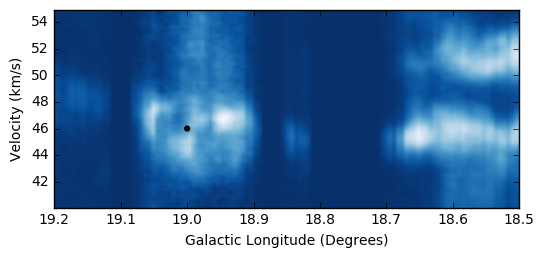

In [19]:
#we need to give imshow the "extent" keyword so it knows what the velocity and longitude range we're looking at is
#You might need to tweak the "aspect" parameter to make it look nicer
#You should be able to plot your scatter points directly over this
extent=[np.max(lonrange).value,np.min(lonrange).value,np.min(velrange).value,np.max(velrange).value]
plt.imshow(lvarray,cmap="Blues_r",extent=extent,origin='lower',aspect=0.02)
plt.xlabel("Galactic Longitude (Degrees)")
plt.ylabel("Velocity (km/s)")

#overlay your scatter points and adjust the limits of the axes. Voila! 
#Remember you'll have to convert your points to km/s!
amyx=np.array([19.0])
amyy=np.array([46])
plt.scatter(amyx,amyy,c='k',edgecolor="None")
plt.xlim(19.2,18.5)
plt.ylim(np.min(velrange).value,np.max(velrange).value)

In [21]:
outfile="Fil5_custom_pvfig.fits"

newhdr = fits.Header()
newhdr["CTYPE1"]="GLON"
newhdr["CTYPE2"]="VELOCITY"
newhdr["CRPIX1"]=cube.header['CRPIX1']
newhdr["CRPIX2"]=1
newhdr["CRVAL1"]=cube.header['CRVAL1']
newhdr["CRVAL2"]=np.min(velrange.value)
newhdr["CDELT1"]=cube.header['CDELT1']
newhdr["CDELT2"]=cube.header['CDELT3']

fits.writeto(outfile,lvarray,newhdr,clobber=True)